https://scikit-learn.org/stable/modules/outlier_detection.html

In [2]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [4]:
print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

In [6]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

OneClassSVM 은 outlier 비율인/overfitting 방지를 위해 nu 파라미터를 잘 정해줘야하는 문제점이 있음  
- novelty detection
- kernel, scalar parameter를 결정해야함, 경계를 정의하기 위해
- rbf 커널 : bandwidth 파라미터를 결정할 알고리즘이 없을 때 주로 사용
- nu : 새로운 것을 발견할 확률

In [10]:
# 비교해볼 이상 감지 알고리즘
anomaly_algorithm = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction, random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction))
]

In [8]:
# 데이터셋 가져오기
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] - np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)
]

In [9]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

결정 경계 : 검은색 (LOF 는 새 데이터에 적용할 방법이 없어서 표시 안 됨)

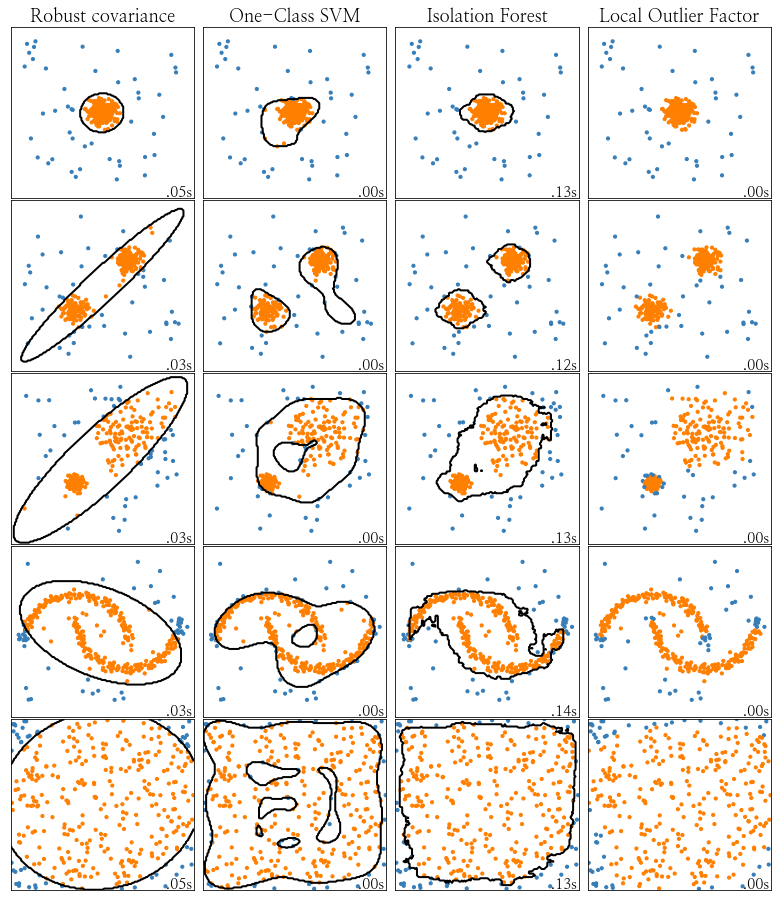

In [14]:
plt.figure(figsize=(len(anomaly_algorithm) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithm:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithm), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

### 아래는 확인

In [15]:
type(datasets)

list

In [17]:
len(datasets)

5

In [18]:
for i in range(len(datasets)):
    print(i, len(datasets[i]))

0 255
1 255
2 255
3 300
4 300


#### Outlier Detection

Yet, in the case of outlier detection, we don’t have a clean data set representing the population of regular observations that can be used to train any tool.  
일반적인 관측을 나타내는 깨끗한 데이터가 존재하지 않는다.  

covariance.EllipticEnvelope 

ensembel.IsolationForest